In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io
from preproc import *

# Data obtained from sensors

We have 10 datasets:
1. 989.09 meters &nbsp; &nbsp; | &nbsp; 21 defects &nbsp; | &nbsp; 116 welds &nbsp; | &nbsp; 1 or 2 sections don't work
2. 2705.02 meters &nbsp; | &nbsp; 7 defects &nbsp; &nbsp; | &nbsp; 276 welds &nbsp; | &nbsp; 1 or 2 sections don't work
3. 7890.75 meters &nbsp; | &nbsp; 15 defects &nbsp; | &nbsp; 819 welds &nbsp; | &nbsp; small sensors issues
4. 2743.74 meters &nbsp; | &nbsp; 39 defects &nbsp; | &nbsp; 269 welds &nbsp; | &nbsp; 1 section doesn't work
5. 15162.85 meters&nbsp;|&nbsp; 745 defects &nbsp;|&nbsp; 1462 welds &nbsp;| &nbsp; 2 or 3 sections don't work
6. 752.80 meters &nbsp; &nbsp; | &nbsp; 1 defect &nbsp; &nbsp; &nbsp; | &nbsp; 111 welds &nbsp; | &nbsp; 1 section doesn't work
7. 1786.21 meters &nbsp; | &nbsp; 12 defects &nbsp; | &nbsp; 219 welds &nbsp; | &nbsp; 1, 2 or 3 sections don't work
8. 4528.35 meters &nbsp; | &nbsp; 15 defects &nbsp; | &nbsp; 431 welds &nbsp; | &nbsp; small sensors issues
9. 982.56 meters &nbsp; &nbsp; | &nbsp; 15 defects &nbsp; | &nbsp; 107 welds &nbsp; | &nbsp; no issues
10. 18883.02 meters&nbsp;| &nbsp; 72 defects &nbsp; |&nbsp; 1708 welds &nbsp;| &nbsp; small sensors issues

For the research we selected 5th dataset because of the defects amount.

Let us upload it:

In [2]:
df = pd.read_csv('../../data/raw_data/mag_5/magnetogram.csv')

In [3]:
df.head(3)

,Tag,Size,Time,Dist,Wheel1_v,Wheel2_v,Index,Angle,Flags,Dist_ext,...,15.1,15.2,15.3,15.4,Status 16,16.1,16.2,16.3,16.4,CRC
0,VDF0,112,38.481254,-3075,3399,1367,0,0,6b,0,...,0,0,35,0,0,0,0,0,0,40536e88
1,VDF0,112,52.869986,-2743,3474,1348,1,0,2b,0,...,68,153,218,258,0,0,0,0,0,a6493a3d
2,VDF0,112,54.780140,-3078,3513,1273,2,0,4b,0,...,79,32,44,56,0,0,0,0,0,c6a4697f


We use preprocessing for selecting important columns, distance correcting, etc.

In [4]:
df = get_df(df)

Finally, dataset looks like this:

In [5]:
df.head(3)

,1.1,1.2,1.3,1.4,2.1,2.2,2.3,2.4,3.1,3.2,...,14.3,14.4,15.1,15.2,15.3,15.4,16.1,16.2,16.3,16.4
7.67144,3171,3180,3174,3164,3172,3178,3188,3199,0,0,...,3200,3193,3207,3195,3195,3173,3187,3189,3206,3183
7.67484,3172,3180,3177,3166,3170,3179,3189,3200,0,0,...,3200,3194,3206,3195,3196,3173,3186,3188,3202,3183
7.67819,3171,3176,3177,3165,3172,3176,3190,3199,0,0,...,3200,3189,3206,3194,3198,3175,3186,3191,3201,3182


Let us look at the data in appropriate way.

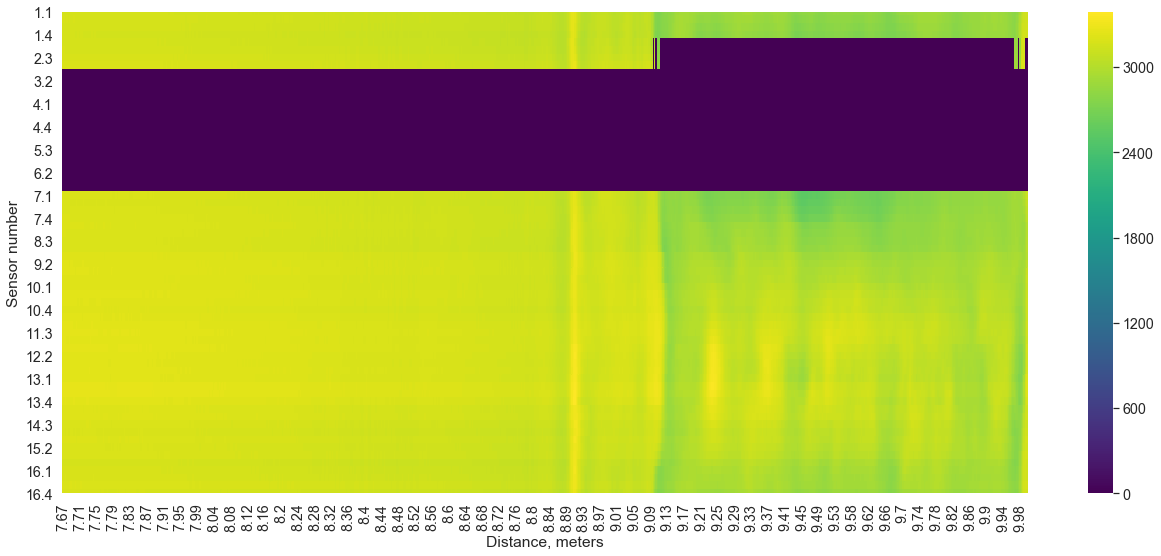

In [6]:
df_to_plot = df[:10]
df_to_plot.index = np.round(df_to_plot.index, 2)
num_of_labels = int(df_to_plot.shape[1]/5)

sns.set(rc={'figure.figsize':(18,8)})
sns.set(font_scale=1.3)
sns_plot = sns.heatmap(df_to_plot.T, cbar=True, xticklabels=num_of_labels, cmap='viridis')
plt.xlabel('Distance, meters')
plt.ylabel('Sensor number')
plt.tight_layout()
plt.show()

# Defects

Let us upload defects file.

In [7]:
defects = pd.read_csv('../../data/defects/defects_5.csv', index_col='Unnamed: 0')

In [8]:
defects.rename(columns={
    '№ дефекта':'№ of the defect',
    'Дистанция, м':'Distance, m',
    'Дистанция от начала секции до максимума сигнала, м':'Distance from the section beginning to the signal max, m',
    '№ секции':'№ of the section',
    'Тип дефекта':'Defect type',
    'Глубина, %':'Defect depth, %',
    'Размер зоны индикации LxB, мм':'Indication zone size LxB, mm',
    'Толщина стенки, мм':'Wall thickness, mm',
    'Местоположение дефекта':'Defect location',
    'Номер магнито-граммы':'№ of the magnitogramm',
}, inplace=True)

In [9]:
defects.head(3)

,№ of the defect,"Distance, m","Distance from the section beginning to the signal max, m",№ of the section,Defect type,"Defect depth, %","Размер зоны индикации BxL, мм","Wall thickness, mm",Defect location,№ of the magnitogramm
0,1,168.36,0.00,26,Коррозия шва,NaN,15x150,8.0,Сварной шов,NaN
1,2,373.90,0.00,45,Коррозия шва,NaN,10х70,7.7,Сварной шов,NaN
2,3,566.62,3.24,62,Коррозионная риска,35.0,10х40,7.5,Стенка трубы,NaN


There are different defect types:

In [10]:
defects['Defect type'].value_counts()

Питтинг                        185
Общая коррозия (скопление)     169
Коррозионная канавка           108
Язвенная коррозия              104
Скопление питтингов             80
Коррозия шва                    35
Скопление язвенных коррозий     30
Коррозионная риска              29
Питтинг                          3
Коррозионная риска               1
Общая коррозия (скопление)       1
Name: Defect type, dtype: int64

They generally follow the classification:

<img src="figures/defect_classes.png" align="left" alt="alt text" width="400"/>

For now we do not separate defects classes, we count all of them as a single class - 'defect'.

There are different defect locations:

In [11]:
defects['Defect location'].value_counts()

Стенка трубы    711
Сварной шов      34
Name: Defect location, dtype: int64

We choose the defects located on the pipe wall (in Russion 'Стенка трубы').

In [12]:
pictures_with_defects = crop_squares_with_defects(df, 
                                                  defects[defects['Defect location'] =='Стенка трубы'], 
                                                  centering=False, 
                                                  scaling=False)

In [13]:
print(f'Total number of pictures with defects is equal to {len(pictures_with_defects)}')

Total number of pictures with defects is equal to 711


# Welds

Let us upload journal file.

In [15]:
journal = pd.read_excel('../../data/journals/journal_5.xlsx')

In [16]:
journal.rename(columns={
    '№ секции':'№ of the section',
    'Местоположение начала секции по дистанции трубопровода, м':'Location of the section beginning, m',
    'Длина секции, м':'Section length, m',
    'Номина-льная толщина стенки, мм':'Nominal wall thickness, mm',
    'Средняя толщина стенки, мм':'Mean wall thickness, mm',
    'Внешний диаметр трубы, мм':'Outside pipe diameter, mm',
    'Тип секции':'Section type',
}, inplace=True)

In [17]:
journal = journal[(journal['Location of the section beginning, m'] > df.index[0]) &
                 (journal['Location of the section beginning, m'] < df.index[-1])]

In [18]:
journal.head(3)

,№ of the section,"Location of the section beginning, m","Section length, m","Nominal wall thickness, mm","Mean wall thickness, mm","Outside pipe diameter, mm",Section type
9,10,8.90,1.30,8.0,NaN,219.0,отвод
10,11,10.21,8.43,8.0,8.4,219.0,бесшовная
11,12,18.64,11.83,8.0,8.4,219.0,бесшовная


Let us check the variety of section types:

In [19]:
journal['Section type'].value_counts()

бесшовная      860
прямошовная    570
отвод           15
задвижка         1
Name: Section type, dtype: int64

In [19]:
pictures_with_normal_welds, pictures_with_defected_welds = crop_squares_with_welds(df, 
                                                                                   journal, 
                                                                                   defects, 
                                                                                   centering=False, 
                                                                                   scaling=False)

In [20]:
print(f'Total number of pictures with welds without defects is equal to {len(pictures_with_normal_welds)}')
print(f'Total number of pictures with defected welds is equal to {len(pictures_with_defected_welds)}')

Total number of pictures with welds without defects is equal to 1412
Total number of pictures with defected welds is equal to 34


# Normal data

As a normal data pipes without defects or welds are considered. So we need to select these pipes intervals.

In [22]:
journal = journal[(journal['Section type']=='бесшовная') |
                  (journal['Section type']=='прямошовная')]

In [23]:
normal_pictures = crop_squares_with_normal(df, 
                                           journal, 
                                           defects, 
                                           scaling=False)

In [24]:
print(f'Total number of pictures with without any defects or welds is equal to {len(normal_pictures)}')

Total number of pictures with without any defects or welds is equal to 11690


Here we provide samples with a normal pipe wall, defect, normal weld and defected weld:

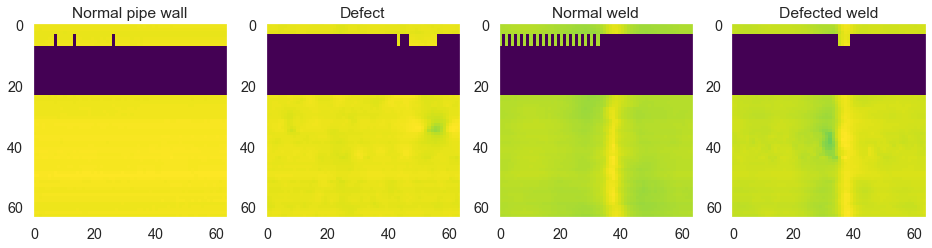

In [76]:
plt.figure(figsize=(16,10))
plt.subplot(1,4,1)
plt.imshow(normal_pictures[5], cmap='viridis')
plt.title('Normal pipe wall')
plt.grid(False)
plt.subplot(1,4,2)
plt.imshow(pictures_with_defects[55], cmap='viridis')
plt.title('Defect')
plt.grid(False)
plt.subplot(1,4,3)
plt.imshow(pictures_with_normal_welds[5], cmap='viridis')
plt.title('Normal weld')
plt.grid(False)
plt.subplot(1,4,4)
plt.imshow(pictures_with_defected_welds[1], cmap='viridis')
plt.title('Defected weld')
plt.grid(False)
plt.show()

# Outcomes

Raw data has several issues that don't allow to solve CV problems without proper preprocessing.

- Sensors malfunctions cause zeroed signals. To fill them, following methods are proposed:
    1. Abnormal values ($<2000$) are equal to 0. Then Min-Max scaling to $[0.5:1]$ range.
    2. Abnormal values are equal to the mean of normal values from one picture. Then Min-Max scaling.
    3. Abnormal values are equal to the mean of normal values over the column. Then Min-Max scaling.
    4. Abnormal values are equal to the mean of neighboring sensors over the column. Then Min-Max scaling.
    5. Abnormal values are equal to the interpolation results over the column. Then Min-Max scaling.
    
- Displaced origins between data and reports coordinates.
- Inaccurate annotations, e.g. missed defects, wrong defect location, etc.

## 1st issue: Sensors malfunctions problem

We are going to explore different filling methods.

In [27]:
def filling2(picture):
    im = picture.copy()
    mean = np.mean(im)

    im[im == 0] = mean
    return im

In [29]:
def filling3(picture):
    im = picture.copy()
    for i in range(len(im)):
        col = im[:,i]
        mean = np.mean(col[col > 0])
        col[col == 0] = mean
    return im

In [31]:
def filling4(picture):
    im = picture.copy()
    for i in range(len(im)):
        col = im[:,i]
        indices = np.where(col == 0)[0]
        first_index = indices[0]
        last_index = indices[-1]+1
        
        if (64-last_index) < 4:
            indices = np.array([*np.arange(first_index-4,first_index), *np.arange(last_index,64)])
        else:
            indices = np.array([*np.arange(first_index-4,first_index), *np.arange(last_index,last_index+4)])

        mean = np.mean(col[indices])
        col[col == 0] = mean
    return im

In [33]:
def filling5(picture):
    im = picture.copy()
    for i in range(len(im)):
        col = im[:,i]
        indices = np.where(col == 0)[0]
        first_index = indices[0]-1
        last_index = indices[-1]+1
        if last_index == 64:
            last_index = 0
        col[col == 0] = np.linspace(col[first_index], col[last_index], len(col[col == 0]))
    return im

In [26]:
image = normal_pictures[5].copy()

In [28]:
im1 = filling2(image)

In [30]:
im2 = filling3(image)

In [32]:
im3 = filling4(image)

In [34]:
im4 = filling5(image)

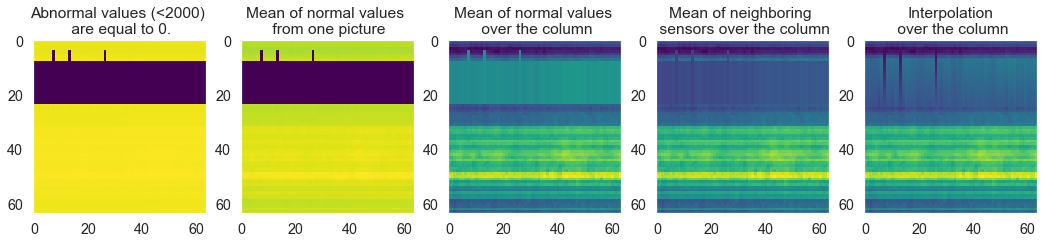

In [69]:
plt.figure(figsize=(18,10))
plt.subplot(1,5,1)
plt.imshow(image, cmap='viridis')
plt.grid(False)
plt.title('Abnormal values (<2000) \n are equal to 0.')
plt.subplot(1,5,2)
plt.imshow(im1, cmap='viridis')
plt.grid(False)
plt.title('Mean of normal values \n from one picture')
plt.subplot(1,5,3)
plt.imshow(im2, cmap='viridis')
plt.grid(False)
plt.title('Mean of normal values \n over the column')

# plt.figure(figsize=(12,8))
plt.subplot(1,5,4)
plt.imshow(im3, cmap='viridis')
plt.grid(False)
plt.title('Mean of neighboring \n sensors over the column')
plt.subplot(1,5,5)
plt.imshow(im4, cmap='viridis')
plt.grid(False)
plt.title('Interpolation\n over the column')

plt.show()

## 2nd issue: Wrong defect location

In [84]:
pictures_with_defects_centered = crop_squares_with_defects(df, 
                                                  defects[defects['Defect location'] =='Стенка трубы'], 
                                                  scaling=False)

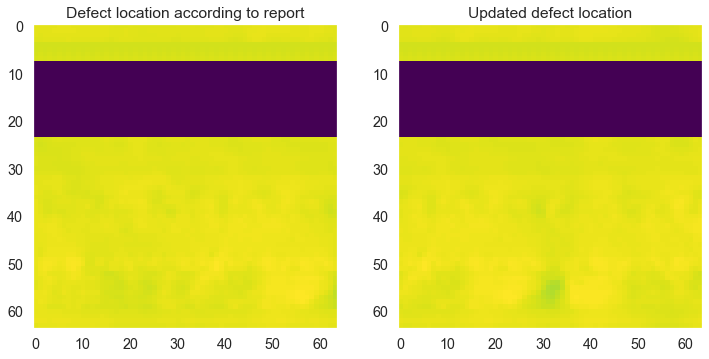

In [100]:
i = 1
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(pictures_with_defects[i], cmap='viridis')
plt.grid(False)
plt.title('Defect location according to report')
plt.subplot(1,2,2)
plt.imshow(pictures_with_defects_centered[i], cmap='viridis')
plt.grid(False)
plt.title('Updated defect location')

plt.show()

# Pictures saving

In [36]:
# # saving normal pictures
# train_test_saving(normal_pictures, kind='normal')

In [37]:
# # saving pictures with normal welds
# train_test_saving(pictures_with_normal_welds, kind='normal_weld')

In [38]:
# # saving pictures with defects
# train_test_saving(pictures_with_defects, kind='defect')

In [44]:
max_ = df.max().max()

In [47]:
import pickle
with open('../../data1_not_centered.pkl', 'wb') as f:
    pickle.dump([[picture / max_ for picture in normal_pictures], 
                 [picture / max_ for picture in pictures_with_normal_welds], 
                 [picture / max_ for picture in pictures_with_defects]], f)

In [48]:
import pickle
with open('../../data2_not_centered.pkl', 'wb') as f:
    pickle.dump([[filling2(picture / max_) for picture in normal_pictures], 
                 [filling2(picture / max_) for picture in pictures_with_normal_welds], 
                 [filling2(picture / max_) for picture in pictures_with_defects]], f)

In [49]:
import pickle
with open('../../data3_not_centered.pkl', 'wb') as f:
    pickle.dump([[filling3(picture / max_) for picture in normal_pictures], 
                 [filling3(picture / max_) for picture in pictures_with_normal_welds], 
                 [filling3(picture / max_) for picture in pictures_with_defects]], f)

In [50]:
import pickle
with open('../../data4_not_centered.pkl', 'wb') as f:
    pickle.dump([[filling4(picture / max_) for picture in normal_pictures], 
                 [filling4(picture / max_) for picture in pictures_with_normal_welds], 
                 [filling4(picture / max_) for picture in pictures_with_defects]], f)

In [51]:
import pickle
with open('../../data5_not_centered.pkl', 'wb') as f:
    pickle.dump([[filling5(picture / max_) for picture in normal_pictures], 
                 [filling5(picture / max_) for picture in pictures_with_normal_welds], 
                 [filling5(picture / max_) for picture in pictures_with_defects]], f)

# Dataset for validation

`todo`